In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the Iris dataset
iris_data = pd.read_csv('Iris.csv')

In [3]:
# Preprocess the data
iris_data.dropna(inplace=True)
X = iris_data[['SepalLengthCm', 'SepalWidthCm']].values


In [4]:
# Normalize the features
X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [5]:
# Define the K-Means clustering function
def k_means(X, K, max_iterations=100):
    # Randomly initialize centroids
    random_indices = np.random.choice(X.shape[0], K, replace=False)
    centroids = X[random_indices]
    
    for _ in range(max_iterations):
        # Assign data points to the closest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        cluster_labels = np.argmin(distances, axis=1)
        
        # Update centroids
        for i in range(K):
            centroids[i] = np.mean(X[cluster_labels == i], axis=0)
    
    return cluster_labels, centroids

In [6]:
# Perform K-Means clustering
K = 3  # Number of clusters
cluster_labels, centroids = k_means(X_normalized, K)

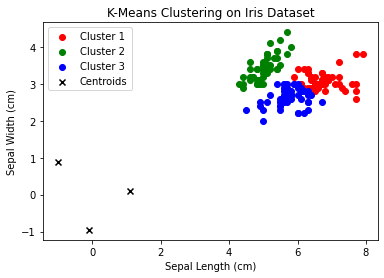

In [7]:
# Visualize the results
colors = ['r', 'g', 'b']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']

for i in range(K):
    indices = np.where(cluster_labels == i)
    plt.scatter(X[indices, 0], X[indices, 1], c=colors[i], label=labels[i])

plt.scatter(centroids[:, 0], centroids[:, 1], c='k', marker='x', label='Centroids')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Means Clustering on Iris Dataset')
plt.legend()
plt.show()